In [9]:

from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure

In [10]:
X = load_boston().data
Y = load_boston().target


In [11]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(data = X_train, columns=load_boston().feature_names)
X_train['Price'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=load_boston().feature_names)
X_test['Price'] = list(y_test)

In [12]:
def sgd_regressor(X, y, learning_rate=0.2, n_epochs=1000, k=40):
    
    w = np.random.randn(1,13)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:13].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, y_tr)
            
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b

In [13]:
  def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:13].values
        y = np.asscalar(np.dot(w,X_test[i])+b)
        y_pred.append(y)
    return np.array(y_pred)
  

In [14]:
w,b = sgd_regressor(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

Epoch: 1, Loss: 477.991
Epoch: 2, Loss: 484.432
Epoch: 3, Loss: 424.142
Epoch: 4, Loss: 490.893
Epoch: 5, Loss: 486.901
Epoch: 6, Loss: 494.129
Epoch: 7, Loss: 516.711
Epoch: 8, Loss: 503.767
Epoch: 9, Loss: 535.625
Epoch: 10, Loss: 508.589
Epoch: 11, Loss: 516.505
Epoch: 12, Loss: 537.660
Epoch: 13, Loss: 524.995
Epoch: 14, Loss: 564.515
Epoch: 15, Loss: 487.327
Epoch: 16, Loss: 539.836
Epoch: 17, Loss: 511.346
Epoch: 18, Loss: 536.605
Epoch: 19, Loss: 514.273
Epoch: 20, Loss: 529.188
Epoch: 21, Loss: 513.956
Epoch: 22, Loss: 557.802
Epoch: 23, Loss: 463.264
Epoch: 24, Loss: 528.040
Epoch: 25, Loss: 516.647
Epoch: 26, Loss: 528.295
Epoch: 27, Loss: 521.711
Epoch: 28, Loss: 554.443
Epoch: 29, Loss: 601.038
Epoch: 30, Loss: 519.941
Epoch: 31, Loss: 517.437
Epoch: 32, Loss: 597.090
Epoch: 33, Loss: 606.161
Epoch: 34, Loss: 520.175
Epoch: 35, Loss: 516.276
Epoch: 36, Loss: 533.801
Epoch: 37, Loss: 521.310
Epoch: 38, Loss: 535.983
Epoch: 39, Loss: 543.088
Epoch: 40, Loss: 545.349
Epoch: 41

<ipython-input-13-c5890c396e97>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = np.asscalar(np.dot(w,X_test[i])+b)


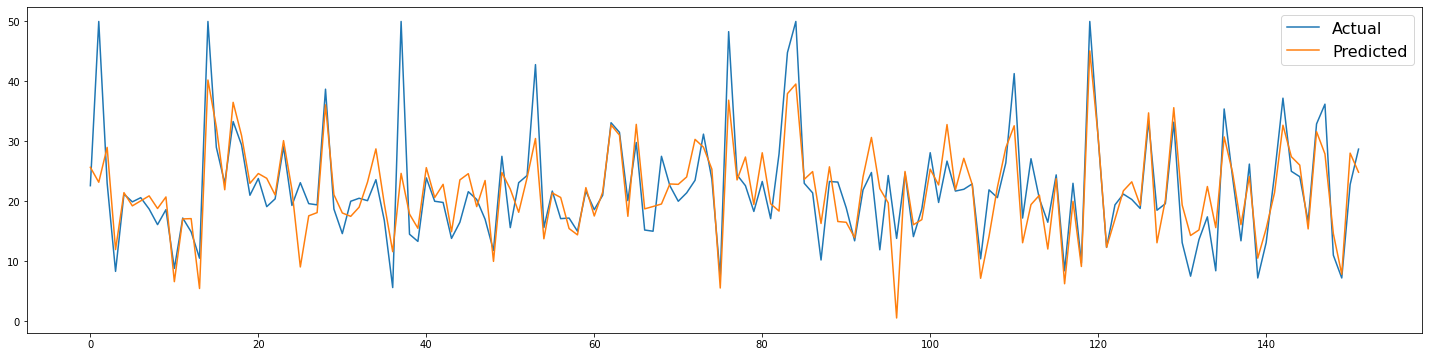

Mean Squared Error : 27.630787951810355


In [15]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

In [ ]:
#REFERENCE

https://towardsdatascience.com/implementing-sgd-from-scratch-d425db18a72c 